In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 47

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 42)                0         
                                                                 
 dense (Dense)               (None, 20)                860       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 47)                517       
                                                                 
Total params: 1,587
Trainable params: 1,587
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
27/47 [================>.............] - ETA: 0s - loss: 3.8357 - accuracy: 0.0379 
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 1s 9ms/step - loss: 3.8108 - accuracy: 0.0445 - val_loss: 3.7576 - val_accuracy: 0.0518
Epoch 2/1000
31/47 [==================>...........] - ETA: 0s - loss: 3.7421 - accuracy: 0.0509
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 0s 4ms/step - loss: 3.7261 - accuracy: 0.0518 - val_loss: 3.6358 - val_accuracy: 0.0760
Epoch 3/1000
24/47 [==============>...............] - ETA: 0s - loss: 3.6407 - accuracy: 0.0671
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
47/47 [==============================] - 0s 4ms/step - loss: 3.6115 - accuracy: 0.0663 - val_loss: 3.4865 - val_accuracy: 0.0986
Epoch 4/1000
26/47 [===============>..............] - ETA: 0s - loss: 3.5145 - accuracy: 0.0667


In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

16/16 [==============================] - 0s 1ms/step - loss: 1.4637 - accuracy: 0.6452


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 80ms/step
[6.3791444e-10 2.0644703e-10 2.4645355e-10 5.0646010e-10 2.8940292e-10
 5.9504388e-11 1.2676593e-10 1.6851330e-09 5.4047378e-10 1.3046926e-10
 1.9230240e-03 2.0745494e-08 3.5984273e-04 2.5050073e-07 1.8648919e-01
 3.4755562e-02 1.0654411e-01 7.2670542e-02 1.1266156e-01 1.1315023e-01
 4.5449525e-04 1.6390012e-01 2.3439329e-02 1.5161611e-02 2.8763913e-02
 8.1417561e-02 2.0724819e-11 1.6835099e-06 2.0854690e-03 1.1716760e-03
 1.8239662e-06 2.8861908e-08 1.3793833e-03 3.2863645e-05 1.5042925e-03
 6.2627996e-06 5.3290355e-06 9.4713023e-06 2.2175694e-04 3.8420485e-04
 7.9785041e-06 8.1521139e-06 5.1350243e-02 8.4530308e-05 5.2872245e-05
 6.0738978e-07 7.1516071e-11]
14


# Confusion matrix

62/62 [==============================] - 0s 591us/step


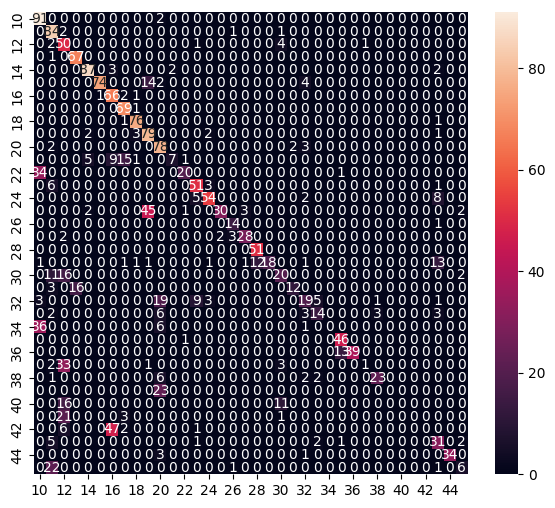

Classification Report
              precision    recall  f1-score   support

          10       0.55      0.98      0.71        93
          11       0.60      0.95      0.73        88
          12       0.34      0.86      0.49        58
          13       0.81      0.99      0.89        68
          14       0.91      0.93      0.92        94
          15       0.99      0.79      0.88        94
          16       0.53      0.94      0.68        70
          17       0.74      0.99      0.85        70
          18       0.92      0.97      0.94        78
          19       0.56      0.91      0.70        87
          20       0.54      0.92      0.68        85
          21       0.78      0.18      0.30        38
          22       0.87      0.36      0.51        55
          23       0.75      0.84      0.79        61
          24       0.86      0.78      0.82        69
          25       0.94      0.36      0.52        83
          26       0.74      0.93      0.82        15
     

C:\Users\yhayt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yhayt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\yhayt\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\yhayt\AppData\Local\Temp\tmpip7_o28p\assets


INFO:tensorflow:Assets written to: C:\Users\yhayt\AppData\Local\Temp\tmpip7_o28p\assets


8436

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[6.37914610e-10 2.06447040e-10 2.46453108e-10 5.06460263e-10
 2.89401864e-10 5.95042904e-11 1.26765959e-10 1.68513326e-09
 5.40473888e-10 1.30469288e-10 1.92302465e-03 2.07454605e-08
 3.59842117e-04 2.50500307e-07 1.86489239e-01 3.47555801e-02
 1.06544018e-01 7.26705790e-02 1.12661563e-01 1.13150224e-01
 4.54495370e-04 1.63900152e-01 2.34393347e-02 1.51616121e-02
 2.87638977e-02 8.14175978e-02 2.07247847e-11 1.68350698e-06
 2.08547036e-03 1.17167714e-03 1.82396491e-06 2.88618356e-08
 1.37938291e-03 3.28636816e-05 1.50429260e-03 6.26279416e-06
 5.32903641e-06 9.47129411e-06 2.21756971e-04 3.84204526e-04
 7.97849862e-06 8.15210024e-06 5.13502024e-02 8.45302420e-05
 5.28722521e-05 6.07388074e-07 7.15160847e-11]
14
